In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import json
import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import seaborn as sns
import shutil
import keras
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import keras
import json
import tensorflow as tf 
from keras.layers import Input
from keras import Sequential
from keras.layers import Dense, LSTM,Flatten, TimeDistributed, Conv2D, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16

from keras.models import load_model
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import numpy as np
import pandas as pd

from skimage.io import imread
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    tn = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1-y_true) * (y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip((y_true) * (1-y_pred), 0, 1)))
    

    f1_val = tp / ( tp + ( (1/2) * (fp+fn) ) + K.epsilon())
    return f1_val
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D,Reshape, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten, UpSampling2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    tn = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1-y_true) * (y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip((y_true) * (1-y_pred), 0, 1)))
    

    f1_val = tp / ( tp + ( (1/2) * (fp+fn) ) + K.epsilon())
    return f1_val

In [2]:
#Change this according to your directory structure 

from glob import glob
import cv2


trn1='D:/data/invasive-aquatic-species-data/noninvasive/*/'
trn2='D:/data/Veligers/To Baylor 2023-01-30/To Baylor 2023-01-30/Ostracod Image1/*/'
trn3='D:/data/invasive-aquatic-species-data/invasive/*/'

tr1= glob(trn1)
tr2= glob(trn2)
tr3= glob(trn3)

trn11='D:/data/Veligers/To Baylor 2023-01-30/To Baylor 2023-01-30/Not Veligers/*/'
trn33='D:/data/Veligers/To Baylor 2023-01-30/To Baylor 2023-01-30/Zebra Pediveliger Image1a/*/'
tr11= glob(trn11)
tr33= glob(trn33)
tr1.extend(tr11)
tr3.extend(tr33)


trn111='D:/data/Ostracod/Ostracods Day 2 Image1 To Baylor/Ostracods Day 2 Image1 To Baylor/Sorted Images/Not/*/'

trn333='D:/data/Veligers/Baylor 2022-03-21/Baylor 2022-03-21/Davis Dam 2019-07-24/Manually Reviewed/Veligers/Images_001/*/'
tr111= glob(trn111)
tr333= glob(trn333)
tr1.extend(tr111)
tr3.extend(tr333)

trn11='D:/data/Ostracod/Preserved Ostracods 1 To Baylor/Preserved Ostracods 1 To Baylor/Sorted Images/Not/*/'
trn33='D:/data/Veligers/Preserved Zebra Ped 1 To Baylor/Preserved Zebra Ped 1 To Baylor/Sorted Images/Pedi-Zebra Veligers/*/'
tr11= glob(trn11)
tr33= glob(trn33)
tr1.extend(tr11)
tr3.extend(tr33)


trn111='D:/data/Veligers/Baylor 2022-03-21/Baylor 2022-03-21/Davis Dam 2019-07-24/Manually Reviewed/NonVeligers/Images_001/*/'
trn333='D:/data/Veligers/Baylor 2022-03-21/Baylor 2022-03-21/Davis Dam 2019-07-24/Manually Reviewed/Veligers/Images_001/*/'
tr111= glob(trn111)
tr333= glob(trn333)
tr1.extend(tr111)
tr3.extend(tr333)

trn11='D:/data/Veligers/Preserved Zebra Ped 1a To Baylor/Preserved Zebra Ped 1a To Baylor/Sorted Images/Not/*/'
trn33='D:/data/Veligers/Preserved Zebra Ped 1a To Baylor/Preserved Zebra Ped 1a To Baylor/Sorted Images/Preserved Zebra Ped 1a/*/'
tr11= glob(trn11)
tr33= glob(trn33)
tr1.extend(tr11)
tr3.extend(tr33)


trn111='D:/data/Veligers/Baylor 2022-03-21/Baylor 2022-03-21/Davis Dam 2019-07-24/Manually Reviewed/NonVeligers/Images_001/*/'
trn333='D:/data/Veligers/Baylor 2022-03-21/Baylor 2022-03-21/Davis Dam 2019-07-24/Manually Reviewed/Veligers/Images_001/*/'
tr111= glob(trn111)
tr333= glob(trn333)
tr1.extend(tr111)
tr3.extend(tr333)

trnl1='D:/data/Ostracod/Ostracod Day 2 Image12 Short To Baylor/Ostracod Day 2 Image12 To Baylor/Sorted Images/Ostracods/*/'
trnl2='D:/data/Ostracod/Ostracods Day 2 Image1 To Baylor/Ostracods Day 2 Image1 To Baylor/Sorted Images/Ostracods/*/'
trnl3='D:/data/Ostracod/Ostracods Day 2 Image2 To Baylor/Ostracods Day 2 Image2 To Baylor/Sorted Images/Ostracods/*/'
trnl4='D:/data/Ostracod/Ostracods Day 2 Image3 To Baylor/Ostracods Day 2 Image3 To Baylor/Sorted Images/Ostracods/*/'
trnl5='D:/data/Ostracod/Ostracods Day 2 Image12 To Baylor/Ostracods Day 2 Image12 To Baylor/Sorted Images/Ostracods/*/'
trnl6='D:/data/Ostracod/Preserved Ostracods 1 To Baylor/Preserved Ostracods 1 To Baylor/Sorted Images/Preserve Ostracods/*/'
trnl7='D:/data/Ostracod/Preserved Ostracods 1a To Baylor/Preserved Ostracods 1a To Baylor/Sorted Images/Preserved Ostracods 1a/*/'

trl1= glob(trnl1)
trl2= glob(trnl2)
trl3= glob(trnl3)
trl4= glob(trnl4)
trl5= glob(trnl5)
trl6= glob(trnl6)
trl7= glob(trnl7)


tr2.extend(trl1)
tr2.extend(trl2)
tr2.extend(trl3)
tr2.extend(trl4)
tr2.extend(trl5)
tr2.extend(trl6)
tr2.extend(trl7)



In [5]:
from glob import glob
from sklearn.utils import shuffle

tr1= shuffle(tr1)
tr2= shuffle(tr2)

tran_index_noninv = np.round( len(tr1)* .3  )   #Make all of these .6
tran_index_inv = np.round( len(tr3)* .3  )
tran_index_noninv

1468.0

In [4]:
print ( "Number of Objects for Non-Invasive, Invasive and Ostracod :" , len(tr1), len(tr3), len(tr2)) #Mention these and the total in paper. 
#You should have enough data to get near 10,000 total

Number of Objects for Non-Invasive, Invasive and Ostracod : 4893 1282 104


In [8]:
# Lets read training data

In [6]:
data = []
label = []
breath = []
total = 0

for j in tr3[:(int) (tran_index_inv)]:
    label.append(1)
    a = glob(j+'/*')
    breath.append(len(a))
    total = total + len(a)
    
for j in tr1[:(int) (tran_index_noninv)]:
    label.append(0)
    a = glob(j+'/*')
    breath.append(len(a)) 
    total = total + len(a)


for j in range(0,len(tr3[:(int) (tran_index_inv)])):
    a = glob(tr3[j]+'/*')
    for k in range(0,5):
        data.append(a[k])

for j in range(0,len(tr1[:(int) (tran_index_noninv)])):
    a = glob(tr1[j]+'/*')
    for k in range(0,5):
        data.append(a[k])        


imgdata=[]
for i in range(len(data)):
    a = Image.open(data[i])
    b = tf.image.resize_with_crop_or_pad(tf.keras.preprocessing.image.img_to_array(a), 28, 28)
    c = np.array(b)
    imgdata.append(c.reshape(28,28,3))
    
from tensorflow.keras.utils import to_categorical
idata = np.array(imgdata)
X_train = idata
X_train = X_train.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train),28,28,3))


In [7]:
end= 0
train_df= []
breath = 5

i = 0
for i in range(0, len(label)):
    deff = []
    for k in range(0, (breath)):
        
        index = (i*5+k)
        
        deff.append(X_train[index])
        
    train_df.append(deff)

Y_train = to_categorical(label)
train_df = np.array(train_df)
YY_Train = label
np.shape(train_df)

(1853, 5, 28, 28, 3)

In [11]:
np.shape(train_df) #Amount of training data. Mention this in paper.

9420

In [ ]:
#Test data read

In [24]:
data = []
label = []
breath = []
total = 0

for j in tr3[(int) (tran_index_inv) + 1 :]:
    label.append(1)
    a = glob(j+'/*')
    breath.append(len(a))
    total = total + len(a)
    
for j in tr1[ (int)(tran_index_noninv) + 1:]:
    label.append(0)
    a = glob(j+'/*')
    breath.append(len(a)) 
    total = total + len(a)

    
for j in range(0,len(tr3[(int) (tran_index_inv) + 1 :])):
    a = glob(tr3[j]+'/*')
    for k in range(0,5):
        data.append(a[k])

for j in range(0,len(tr1[ (int)(tran_index_noninv) + 1:])):
    a = glob(tr1[j]+'/*')
    for k in range(0,5):
        data.append(a[k])  


imgdata=[]
for i in range(len(data)):
    a = Image.open(data[i])
    b = tf.image.resize_with_crop_or_pad(tf.keras.preprocessing.image.img_to_array(a), 28, 28)
    c = np.array(b)
    imgdata.append(c.reshape(28,28,3))
    
from tensorflow.keras.utils import to_categorical
idata = np.array(imgdata)
X_test = idata
X_test = X_test.astype('float32') / 255.
X_test = np.reshape(X_test, (len(X_test),28,28,3))



In [25]:
end= 0
test_df= []
breath = 5

i = 0
for i in range(0, len(label)):
    deff = []
    for k in range(0, (breath)):
        
        index = (i*5 + k)
        
        deff.append(X_test[index])
        
    test_df.append(deff)
    
Y_test = to_categorical(label)
test_df = np.array(test_df)
YY_Test = label
np.shape(test_df)

(624, 5, 28, 28, 3)

In [36]:
DATASET_NAME = "organmnist3d"
BATCH_SIZE = 32
AUTO = tf.data.AUTOTUNE
INPUT_SHAPE = ( 5, 28, 28, 3 )
NUM_CLASSES = 2

# OPTIMIZER
LEARNING_RATE = 1e-4
WEIGHT_DECAY = 1e-5

# TRAINING
EPOCHS = 60

# TUBELET EMBEDDING
PATCH_SIZE = (4, 8, 8)
NUM_PATCHES = (INPUT_SHAPE[0] // PATCH_SIZE[0]) ** 2

# ViViT ARCHITECTURE
LAYER_NORM_EPS = 1e-6
PROJECTION_DIM = 32
NUM_HEADS = 2
NUM_LAYERS = 2

In [ ]:
#THis is the Linear Att-LSTM 

In [8]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection =keras.Sequential(
            [   TimeDistributed(Flatten()),
                layers.Dense(projection_dim)
            ]) 
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded 

In [9]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models

inputs = layers.Input(shape= (5,28,28,3) )

encoded_patches = (PatchEncoder(5, 32 )) (inputs)

for _ in range(6):
    
    x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

    attention_output= layers.MultiHeadAttention (  num_heads=6, key_dim=32, dropout=0.1 )  (x1, x1)
    
    lstm_output =  LSTM(32,return_sequences=True,dropout=0.1)(x1)

    x2 = layers.Add()([attention_output, encoded_patches,lstm_output])

        # Layer Normalization and MLP
    x3 = layers.LayerNormalization(epsilon=1e-6)(x2)


    x3 = keras.Sequential(layers.Dense(units=32, activation=tf.nn.gelu) )(x3)

        # Skip connection
    encoded_patches = layers.Add()([x3, x2])

    # Layer normalization and Global average pooling.
representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

representation = layers.GlobalAvgPool1D()(representation)


outputs = layers.Dense(units=2, activation="softmax") ( representation)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 28, 28,   0           []                               
                                3)]                                                               
                                                                                                  
 patch_encoder (PatchEncoder)   (None, 5, 32)        75456       ['input_1[0][0]']                
                                                                                                  
 layer_normalization (LayerNorm  (None, 5, 32)       64          ['patch_encoder[0][0]']          
 alization)                                                                                       
                                                                                              

In [ ]:
#Use 50-100 epochs of training and mention that and the val_split in paper

In [10]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
history = model.fit(train_df,Y_train,validation_split=0.2,batch_size=32,epochs=2)

Epoch 1/2
47/47 [==============================] - 29s 165ms/step - loss: 0.5628 - accuracy: 0.7321 - val_loss: 0.2674 - val_accuracy: 0.9434
Epoch 2/2
47/47 [==============================] - 4s 82ms/step - loss: 0.3621 - accuracy: 0.8313 - val_loss: 0.1123 - val_accuracy: 0.9596


In [32]:
Y_test_numerical = np.argmax(Y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(Y_test_numerical, p)
print("Accuracy: {:.2f}%".format(accuracy * 100))


from sklearn.metrics import f1_score

# Calculate F1 score for class 1
f1_class1 = f1_score(Y_test_numerical, p, average='macro')
print("F1 score for all classes: {:.2f}%".format(f1_class1 * 100))

# Calculate F1 score for class 1
f1_class1 = f1_score(Y_test_numerical, p, labels=[1], average='macro')
print("F1 score for class 1: {:.2f}%".format(f1_class1 * 100))

# Calculate F1 score for class 1
f1_class1 = f1_score(Y_test_numerical, p, labels=[0], average='macro')
print("F1 score for class 0: {:.2f}%".format(f1_class1 * 100))


Accuracy: 80.61%
F1 score for all classes: 38.45%
F1 score for class 1: 25.77%
F1 score for class 0: 89.59%
F1 score for class 2: 0.00%


In [ ]:
#  Please send me a screen shot of this result before writing on paper or running more experiments.
#  Also in paper write after average of three three experiments with average and var like this : 
#  80.61 +- .45 % . Use excel or something to tabulate the results.

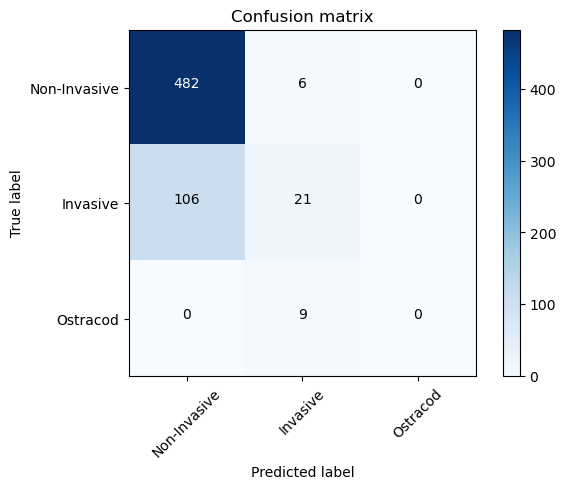

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

# Define the class names
classes = ['Non-Invasive', 'Invasive', 'Ostracod']

# Compute the confusion matrix
cm = confusion_matrix(Y_test_numerical, p)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Normalize the confusion matrix
normalize = False
if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Print the confusion matrix values
fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
#This is the 2D CNN version

In [44]:
#Patch Encoder with Conv2D ,  LSTM , Pos_Emd

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim, **kwargs):
        super(PatchEncoder, self).__init__(**kwargs)
        self.num_patches = num_patches
        self.projection_dim = projection_dim
        self.projection =keras.Sequential(
            [
                (layers.Conv2D(2, (3, 3), strides=(1,1),activation='relu')),
                TimeDistributed(MaxPooling2D(2,2)),
                TimeDistributed(Flatten()),
                layers.Dense(projection_dim)
            ]) 
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )
        
    def get_config(self):
        config = super().get_config()
        config.update({
            "num_patches": self.num_patches,
            "projection_dim": self.projection_dim,
        })
        return config

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded 

In [45]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models

inputs = layers.Input(shape= (5,28,28,3) )

encoded_patches = (PatchEncoder(5, 32 )) (inputs)

for _ in range(6):
    
    x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

    attention_output= layers.MultiHeadAttention (  num_heads=6, key_dim=32, dropout=0.1 )  (x1, x1)
    
    lstm_output =  LSTM(32,return_sequences=True,dropout=0.1)(x1)

    x2 = layers.Add()([attention_output, encoded_patches,lstm_output])

        # Layer Normalization and MLP
    x3 = layers.LayerNormalization(epsilon=1e-6)(x2)


    x3 = keras.Sequential(layers.Dense(units=32, activation=tf.nn.gelu) )(x3)

        # Skip connection
    encoded_patches = layers.Add()([x3, x2])

    # Layer normalization and Global average pooling.
representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

representation = layers.GlobalAvgPool1D()(representation)

#representation = LSTM(100,return_sequences=False,dropout=0.1)(representation)

outputs = layers.Dense(units=2, activation="softmax") ( representation)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 5, 28, 28,   0           []                               
                                3)]                                                               
                                                                                                  
 patch_encoder_3 (PatchEncoder)  (None, 5, 32)       11064       ['input_6[0][0]']                
                                                                                                  
 layer_normalization_23 (LayerN  (None, 5, 32)       64          ['patch_encoder_3[0][0]']        
 ormalization)                                                                                    
                                                                                            

In [46]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
history = model.fit(train_df,Y_train,validation_split=0.2,batch_size=32,epochs=2)

Epoch 1/2
48/48 [==============================] - 15s 88ms/step - loss: 0.6086 - accuracy: 0.7299 - val_loss: 0.6012 - val_accuracy: 0.9178
Epoch 2/2
48/48 [==============================] - 2s 45ms/step - loss: 0.4818 - accuracy: 0.7711 - val_loss: 0.8074 - val_accuracy: 0.8568


In [47]:
Y_test_numerical = np.argmax(Y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(Y_test_numerical, p)
print("Accuracy: {:.2f}%".format(accuracy * 100))


from sklearn.metrics import f1_score

# Calculate F1 score for class 1
f1_class1 = f1_score(Y_test_numerical, p, average='macro')
print("F1 score for all classes: {:.2f}%".format(f1_class1 * 100))

# Calculate F1 score for class 1
f1_class1 = f1_score(Y_test_numerical, p, labels=[1], average='macro')
print("F1 score for class 1: {:.2f}%".format(f1_class1 * 100))

# Calculate F1 score for class 1
f1_class1 = f1_score(Y_test_numerical, p, labels=[0], average='macro')
print("F1 score for class 0: {:.2f}%".format(f1_class1 * 100))


Accuracy: 80.61%
F1 score for all classes: 38.45%
F1 score for class 1: 25.77%
F1 score for class 0: 89.59%
F1 score for class 2: 0.00%


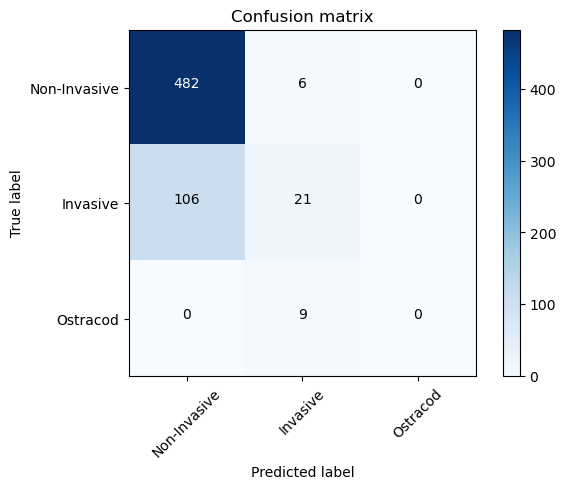

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

# Define the class names
classes = ['Non-Invasive', 'Invasive', 'Ostracod']

# Compute the confusion matrix
cm = confusion_matrix(Y_test_numerical, p)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Normalize the confusion matrix
normalize = False
if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Print the confusion matrix values
fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [34]:
X_train, X_val, y_train, y_val = train_test_split( train_df,YY_Train , test_size=0.2, random_state=42)

In [37]:

@tf.function
def preprocess(frames: tf.Tensor, label: tf.Tensor):
    """Preprocess the frames tensors and parse the labels."""
    # Preprocess images
    frames = tf.image.convert_image_dtype(
        frames[
            ..., tf.newaxis
        ],  # The new axis is to help for further processing with Conv3D layers
        tf.float32,
    )
    # Parse label
    label = tf.cast(label, tf.float32)
    return frames, label


def prepare_dataloader(
    videos: np.ndarray,
    labels: np.ndarray,
    loader_type: str = "train",
    batch_size: int = BATCH_SIZE,
):
    """Utility function to prepare the dataloader."""
    dataset = tf.data.Dataset.from_tensor_slices((videos, labels))

    if loader_type == "train":
        dataset = dataset.shuffle(BATCH_SIZE * 2)

    dataloader = (
        dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
        .batch(batch_size)
        .prefetch(tf.data.AUTOTUNE)
    )
    return dataloader


trainloader = prepare_dataloader(X_train , y_train , "train")
validloader = prepare_dataloader(X_val, y_val, "valid")
testloader = prepare_dataloader(test_df,YY_Test, "test")

In [38]:

class TubeletEmbedding(layers.Layer):
    def __init__(self, embed_dim, patch_size, **kwargs):
        super().__init__(**kwargs)
        self.projection = layers.Conv3D(
            filters=embed_dim,
            kernel_size=patch_size,
            strides=patch_size,
            padding="VALID",
        )
        self.flatten = layers.Reshape(target_shape=(-1, embed_dim))

    def call(self, videos):
        projected_patches = self.projection(videos)
        flattened_patches = self.flatten(projected_patches)
        return flattened_patches


In [39]:

class PositionalEncoder(layers.Layer):
    def __init__(self, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim

    def build(self, input_shape):
        _, num_tokens, _ = input_shape
        self.position_embedding = layers.Embedding(
            input_dim=num_tokens, output_dim=self.embed_dim
        )
        self.positions = tf.range(start=0, limit=num_tokens, delta=1)

    def call(self, encoded_tokens):
        # Encode the positions and add it to the encoded tokens
        encoded_positions = self.position_embedding(self.positions)
        encoded_tokens = encoded_tokens + encoded_positions
        return encoded_tokens


In [40]:



PROJECTION_DIM = 32
def create_vivit_classifier(
    tubelet_embedder,
    positional_encoder,
    input_shape=INPUT_SHAPE,
    transformer_layers=NUM_LAYERS,
    num_heads=NUM_HEADS,
    embed_dim=PROJECTION_DIM,
    layer_norm_eps=LAYER_NORM_EPS,
    num_classes=NUM_CLASSES,
):
    # Get the input layer
    inputs = layers.Input(shape=input_shape)
    # Create patches.
    patches = tubelet_embedder(inputs)
    # Encode patches.
    encoded_patches = positional_encoder(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization and MHSA
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim // num_heads, dropout=0.1
        )(x1, x1)

        # Skip connection
        x2 = layers.Add()([attention_output, encoded_patches])

        # Layer Normalization and MLP
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = keras.Sequential(
            [
                layers.Dense(units=embed_dim * 4, activation=tf.nn.gelu),
                layers.Dense(units=embed_dim, activation=tf.nn.gelu),
            ]
        )(x3)

        # Skip connection
        encoded_patches = layers.Add()([x3, x2])

    # Layer normalization and Global average pooling.
    representation = layers.LayerNormalization(epsilon=layer_norm_eps)(encoded_patches)
    representation = layers.GlobalAvgPool1D()(representation)

    # Classify outputs.
    outputs = layers.Dense(units=2, activation="softmax")(representation)

    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


In [41]:
#Change the num_heads and num_layers

# TUBELET EMBEDDING
PATCH_SIZE = (4, 8, 8)
NUM_PATCHES = (INPUT_SHAPE[0] // PATCH_SIZE[0]) ** 2

NUM_HEADS = 6
NUM_LAYERS = 6
# TRAINING
EPOCHS = 50
PROJECTION_DIM = 32

md = create_vivit_classifier(
        tubelet_embedder=TubeletEmbedding(
            embed_dim=PROJECTION_DIM, patch_size=PATCH_SIZE
        ),
        positional_encoder=PositionalEncoder(embed_dim=PROJECTION_DIM),
    )

md.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 5, 28, 28,   0           []                               
                                3)]                                                               
                                                                                                  
 tubelet_embedding (TubeletEmbe  (None, 9, 32)       24608       ['input_4[0][0]']                
 dding)                                                                                           
                                                                                                  
 positional_encoder (Positional  (None, 9, 32)       288         ['tubelet_embedding[0][0]']      
 Encoder)                                                                                   

In [42]:

PROJECTION_DIM = 32
def run_experiment():
    # Initialize model
    model = create_vivit_classifier(
        tubelet_embedder=TubeletEmbedding(
            embed_dim=PROJECTION_DIM, patch_size=PATCH_SIZE
        ),
        positional_encoder=PositionalEncoder(embed_dim=PROJECTION_DIM),
    )

    # Compile the model with the optimizer, loss function
    # and the metrics.
    optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    # Train the model.
    _ = model.fit(trainloader, epochs=2, validation_data=validloader)

    _, accuracy, top_5_accuracy = model.evaluate(testloader)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return model


model = run_experiment()

Epoch 1/2
48/48 [==============================] - 6s 22ms/step - loss: 0.5656 - accuracy: 0.7810 - top-5-accuracy: 1.0000 - val_loss: 0.5383 - val_accuracy: 0.7745 - val_top-5-accuracy: 1.0000
Epoch 2/2
20/20 [==============================] - 0s 6ms/step - loss: 0.5011 - accuracy: 0.8013 - top-5-accuracy: 1.0000
Test accuracy: 80.13%
Test top 5 accuracy: 100.0%


In [43]:
Y_test_numerical = np.argmax(Y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(Y_test_numerical, p)
print("Accuracy: {:.2f}%".format(accuracy * 100))


from sklearn.metrics import f1_score

# Calculate F1 score for class 1
f1_class1 = f1_score(Y_test_numerical, p, average='macro')
print("F1 score for all classes: {:.2f}%".format(f1_class1 * 100))

# Calculate F1 score for class 1
f1_class1 = f1_score(Y_test_numerical, p, labels=[1], average='macro')
print("F1 score for class 1: {:.2f}%".format(f1_class1 * 100))

# Calculate F1 score for class 1
f1_class1 = f1_score(Y_test_numerical, p, labels=[0], average='macro')
print("F1 score for class 0: {:.2f}%".format(f1_class1 * 100))




Accuracy: 80.61%
F1 score for all classes: 38.45%
F1 score for class 1: 25.77%
F1 score for class 0: 89.59%
F1 score for class 2: 0.00%


In [61]:
np.shape(train_df)

(1884, 5, 28, 28, 3)

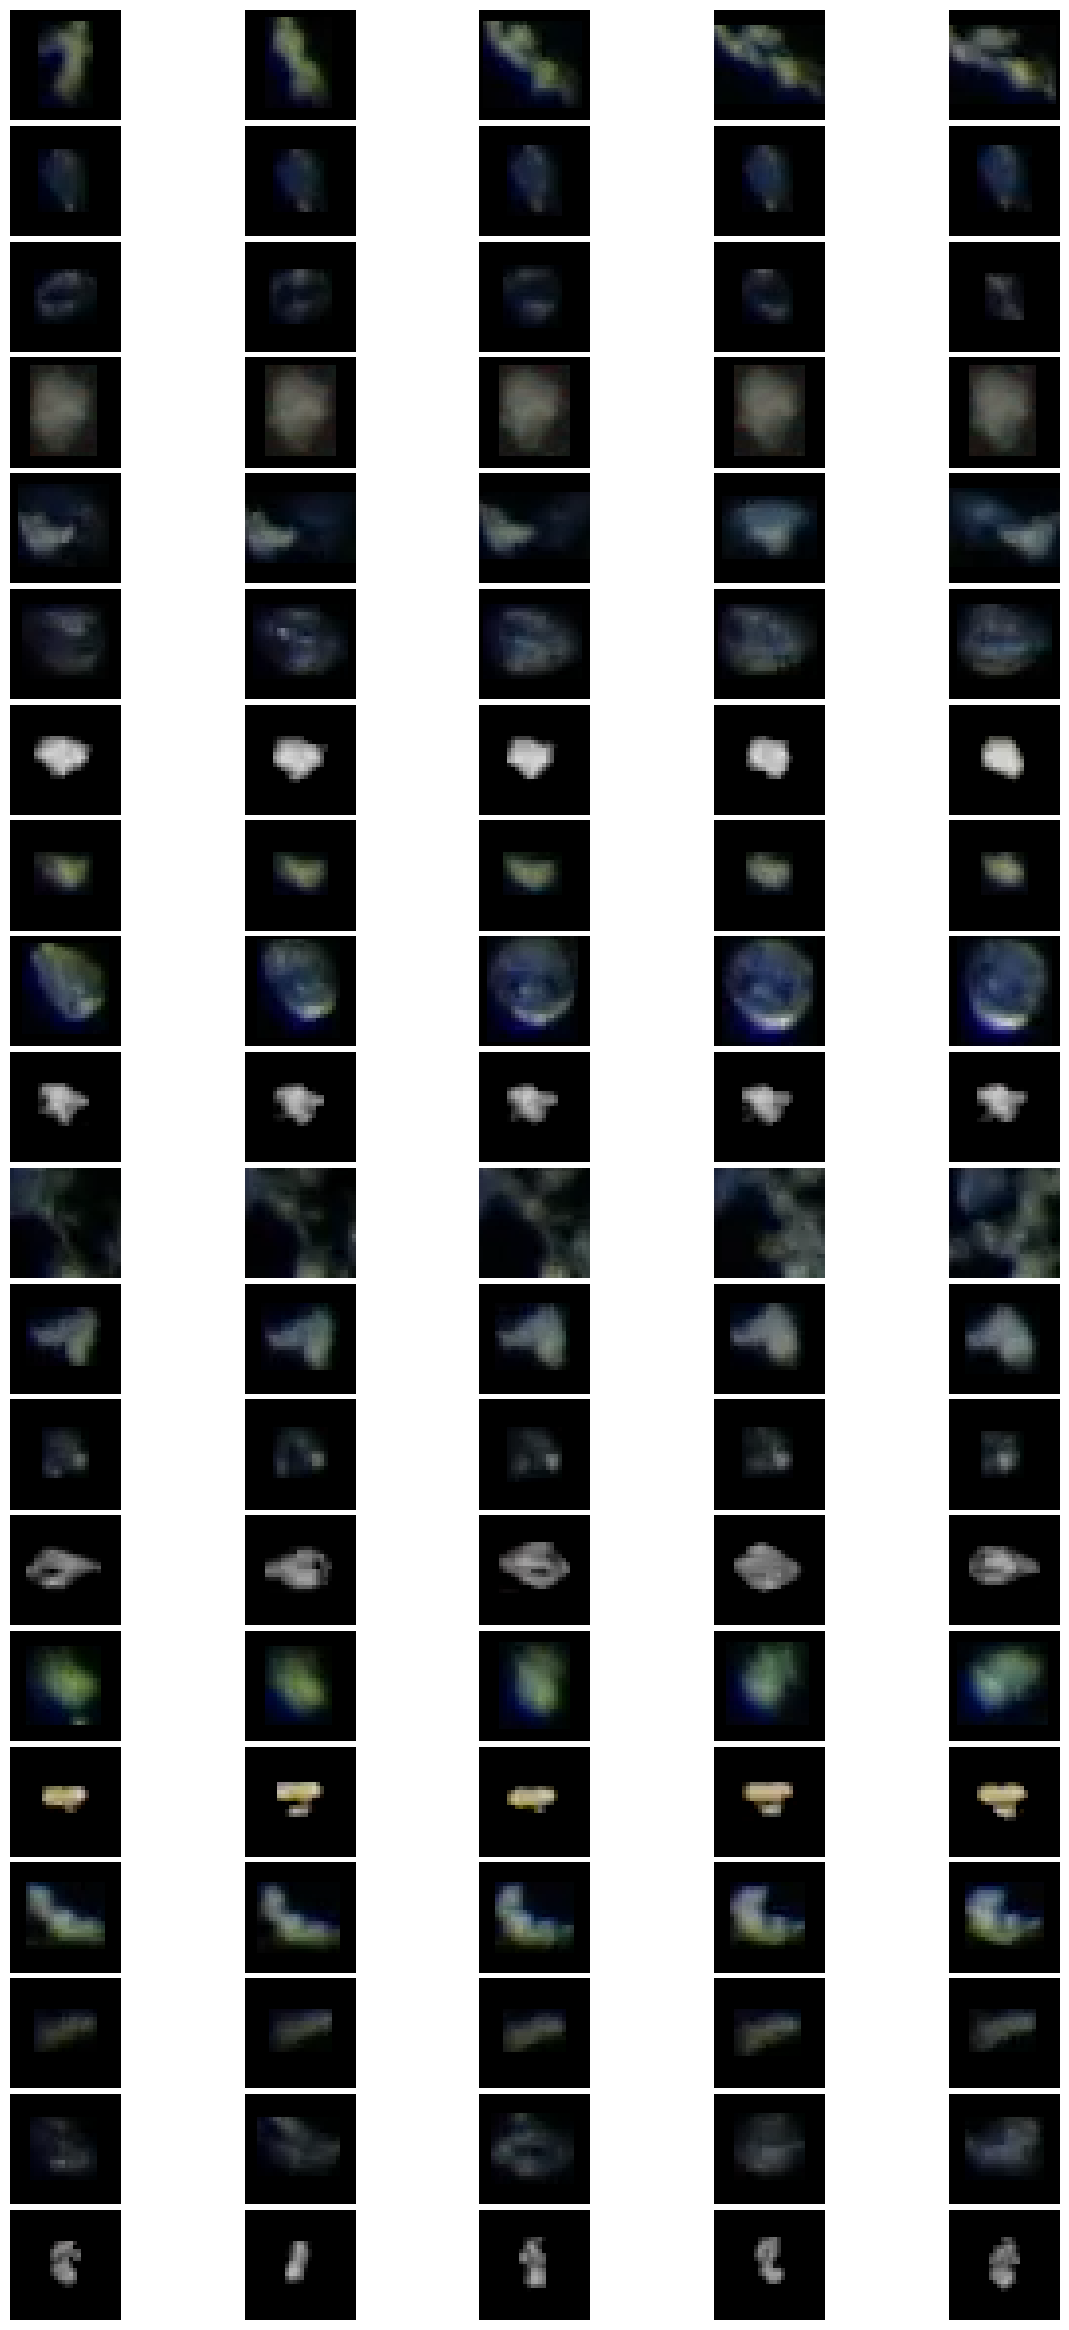

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Select 20 random objects
random_objects = np.random.choice(train_df.shape[0], size=20, replace=False)

# Set up the plot
fig, axes = plt.subplots(20, 5, figsize=(15, 30))

# Iterate over the randomly selected objects
for i, obj_idx in enumerate(random_objects):
    # Select the frames for the current object
    frames = train_df[obj_idx]
    
    # Iterate over the frames and plot them side by side
    for j in range(5):
        axes[i, j].imshow(frames[j])
        axes[i, j].axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# Show the plot
plt.show()


In [63]:
#This is LRCN

In [66]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models

model= models.Sequential()
model.add(TimeDistributed(Conv2D(2, (3, 3), strides=(1,1),activation='relu'),input_shape=(5, 28, 28, 3)))
model.add(TimeDistributed(MaxPooling2D(2,2)))
model.add(TimeDistributed(Conv2D(4, (3, 3), strides=(1,1),activation='relu')))
model.add(TimeDistributed(MaxPooling2D(2,2)))


model.add(TimeDistributed(Flatten()))

model.add(LSTM(5,return_sequences=False,dropout=0.2)) # used 32 units

model.add(Dense(2, activation='softmax'))
model.summary()
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
model.fit(train_df,Y_train,validation_split=0.2,batch_size=32,epochs=2)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_13 (TimeDi  (None, 5, 26, 26, 2)     56        
 stributed)                                                      
                                                                 
 time_distributed_14 (TimeDi  (None, 5, 13, 13, 2)     0         
 stributed)                                                      
                                                                 
 time_distributed_15 (TimeDi  (None, 5, 11, 11, 4)     76        
 stributed)                                                      
                                                                 
 time_distributed_16 (TimeDi  (None, 5, 5, 5, 4)       0         
 stributed)                                                      
                                                                 
 time_distributed_17 (TimeDi  (None, 5, 100)         

In [67]:
Y_test_numerical = np.argmax(Y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(Y_test_numerical, p)
print("Accuracy: {:.2f}%".format(accuracy * 100))


from sklearn.metrics import f1_score

# Calculate F1 score for class 1
f1_class1 = f1_score(Y_test_numerical, p, average='macro')
print("F1 score for all classes: {:.2f}%".format(f1_class1 * 100))

# Calculate F1 score for class 1
f1_class1 = f1_score(Y_test_numerical, p, labels=[1], average='macro')
print("F1 score for class 1: {:.2f}%".format(f1_class1 * 100))

# Calculate F1 score for class 1
f1_class1 = f1_score(Y_test_numerical, p, labels=[0], average='macro')
print("F1 score for class 0: {:.2f}%".format(f1_class1 * 100))


Accuracy: 80.61%
F1 score for all classes: 38.45%
F1 score for class 1: 25.77%
F1 score for class 0: 89.59%
F1 score for class 2: 0.00%
